In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  

%matplotlib inline

In [4]:
df=pd.read_csv('data.csv')
df['private'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#here we have already labeled column if the college is
# private or public but in real life it wont be 


In [5]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

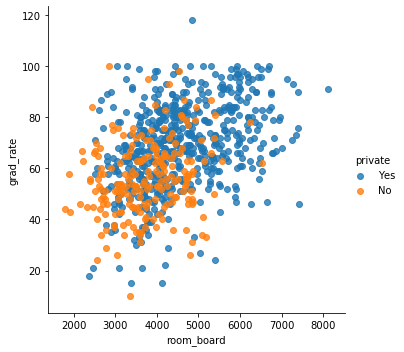

In [12]:
sns.lmplot(x='room_board',y='grad_rate',data=df,hue='private',fit_reg=False)

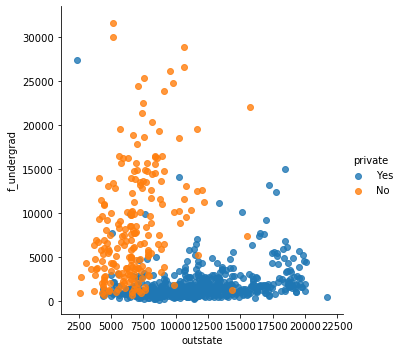

In [15]:
sns.lmplot(data=df,x='outstate',y='f_undergrad',hue='private',fit_reg=False)

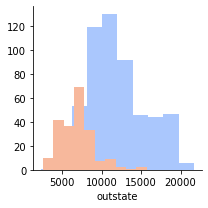

In [24]:
fig=sns.FacetGrid(df,hue='private',palette='coolwarm')
fig=fig.map(plt.hist,'outstate')

In [25]:
 df[df['grad_rate']>100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [27]:
df['grad_rate'][95]=100

/tmp/ipykernel_104054/3407806022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grad_rate'][95]=100


In [28]:
df[df['grad_rate']>100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate


In [44]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(df.drop('private',axis=1))
labels = kmeans.predict(df.drop('private',axis=1))

/home/ada/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [34]:
def convert(private):
    if private=='Yes':
        return 1
    else:
        return 0
df['cluster']=df['private'].apply(convert)

In [35]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,cluster
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [47]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['cluster'],labels))

[[138  74]
 [531  34]]
